In [13]:
import numpy as np

In [1]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle
from sklearn.linear_model import LinearRegression

In [5]:
seg_df = pd.read_csv(r'C:\Users\mvanj\Desktop\segmentation project\segmentation data.csv', index_col = 0)

In [6]:
seg_df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [7]:
seg_df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [8]:
seg_df.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


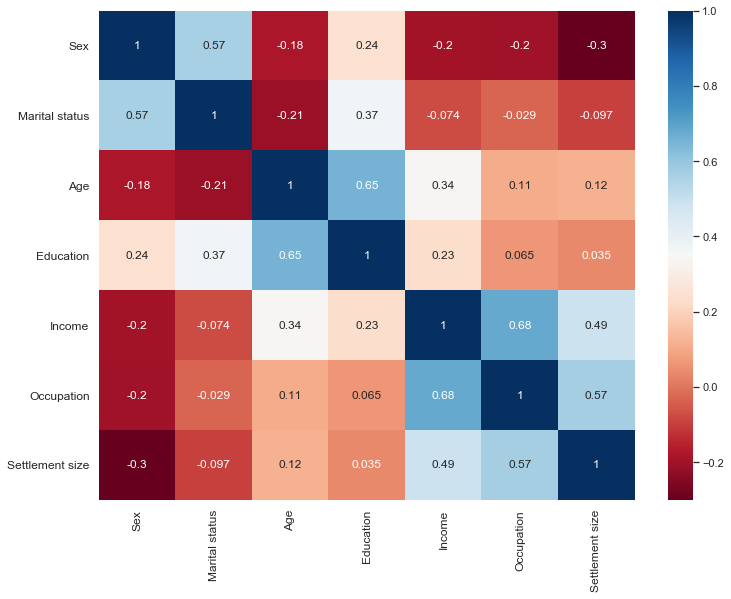

In [14]:
plt.figure(figsize = (12,9))
s = sns.heatmap(seg_df.corr(),annot = True,cmap='RdBu')
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(),rotation = 90, fontsize=12)
plt.show()

# STANDARDIZATION

Text(0.5, 1.0, 'Raw_data')

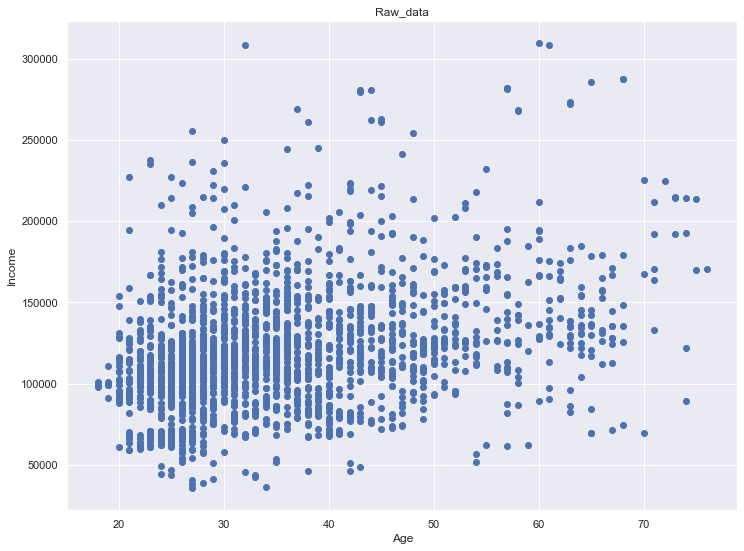

In [15]:
plt.figure(figsize = (12,9))
plt.scatter(seg_df.iloc[:,2],seg_df.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Raw_data')


In [20]:
scaler=StandardScaler()
seg_std = scaler.fit_transform(seg_df)

# HIERARCHIAL CLUSTERING
there are 4 clusters in the data 

In [25]:
hiera_clust = linkage(seg_std, method = 'ward')

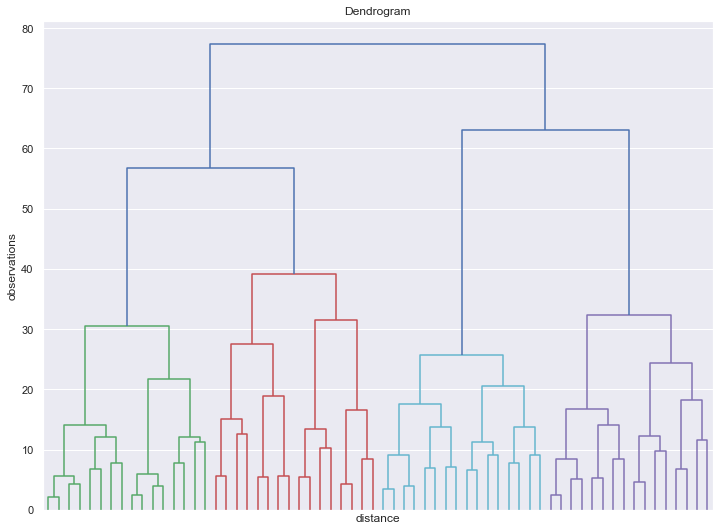

In [29]:
plt.figure(figsize = (12,9))
plt.title('Dendrogram')
plt.ylabel('observations')
plt.xlabel('distance')
dendrogram(hiera_clust,
           truncate_mode = 'level',p=5,
          show_leaf_counts = False,
          no_labels = True,
         )
plt.show()

# K - means clustering

In [33]:
sum_clusters = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init= 'k-means++', random_state = 43)
    kmeans.fit(seg_std)
    sum_clusters.append(kmeans.inertia_)

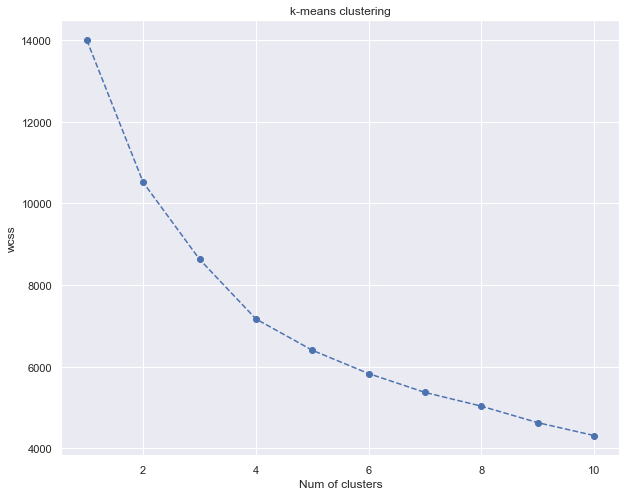

In [34]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),sum_clusters, marker = 'o',linestyle='--')
plt.xlabel('Num of clusters')
plt.ylabel('wcss')
plt.title('k-means clustering')
plt.show()

In [35]:
kmeans = KMeans(n_clusters = 4, init= "k-means++", random_state = 43)
kmeans.fit(seg_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=43, tol=0.0001, verbose=0)

In [36]:
seg_kmeans = seg_df.copy()
seg_kmeans['Segment K-means'] = kmeans.labels_

In [37]:
seg_analysis = seg_kmeans.groupby(['Segment K-means']).mean()
seg_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
1,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [ ]:
#low-income, well-off, career-focused, standard

In [39]:
seg_analysis['obs'] = seg_kmeans[['Segment K-means', 'Sex']].groupby(['Segment K-means']).count()
                                  

In [40]:
seg_analysis['proportion'] = seg_analysis['obs']/seg_analysis['obs'].sum()

In [41]:
seg_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,obs,proportion
Segment K-means,,,,,,,,,
0,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
1,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [73]:
seg_analysis.rename({0: 'low-income',1:'well-off',2:'career driven', 3:'Standard'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,obs,proportion
Segment K-means,,,,,,,,,
low-income,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
career driven,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
Standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [43]:
seg_kmeans['Labels']=seg_kmeans['Segment K-means'].map({0: 'low-income',1:'settled',2:'career driven', 3:'Normal'})

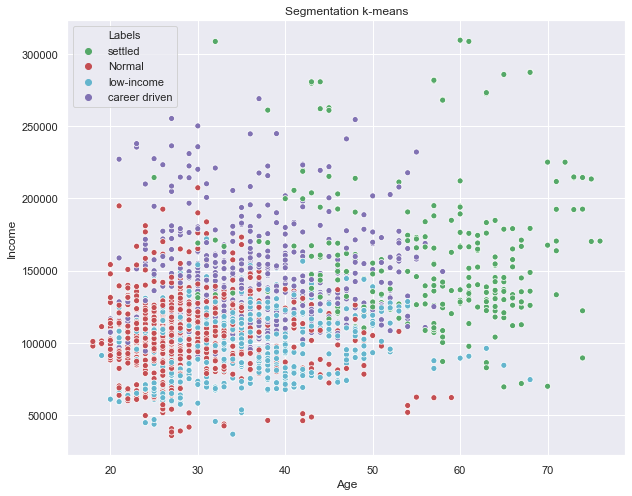

In [44]:
x_axis= seg_kmeans['Age']
y_axis = seg_kmeans['Income']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue=seg_kmeans['Labels'],palette=['g','r','c','m'])
plt.title('Segmentation k-means')
plt.show()

# PCA

In [46]:
pca=PCA()
pca.fit(seg_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [48]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'cum_variance')

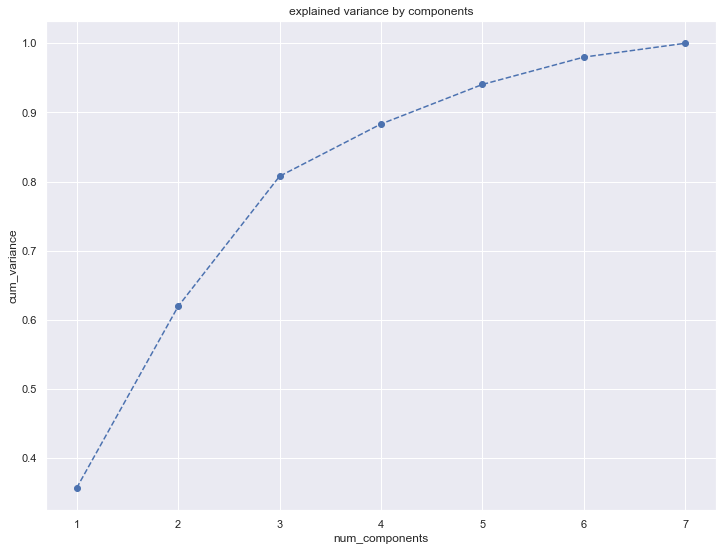

In [49]:
plt.figure(figsize=(12,9))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle = '--')
plt.title('explained variance by components')
plt.xlabel('num_components')
plt.ylabel('cum_variance')

In [50]:
pca = PCA(n_components=3)
pca.fit(seg_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [51]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [56]:
pca_analysis = pd.DataFrame(data = pca.components_,columns=seg_df.columns.values, index=['Component 1','Component 2','Component 3'])
pca_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


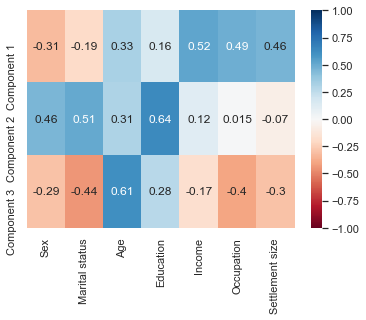

In [58]:
sns.heatmap(pca_analysis,vmin=-1,vmax=1,cmap = 'RdBu',annot=True)

In [60]:
pca_scores = pca.transform(seg_std)

# K-means clustering with PCA

In [64]:
sum_clusters = []
for i in range (1,11):
    kmeans_pca = KMeans(n_clusters = i, init= 'k-means++', random_state = 43)
    kmeans_pca.fit(pca_scores)
    sum_clusters.append(kmeans_pca.inertia_)

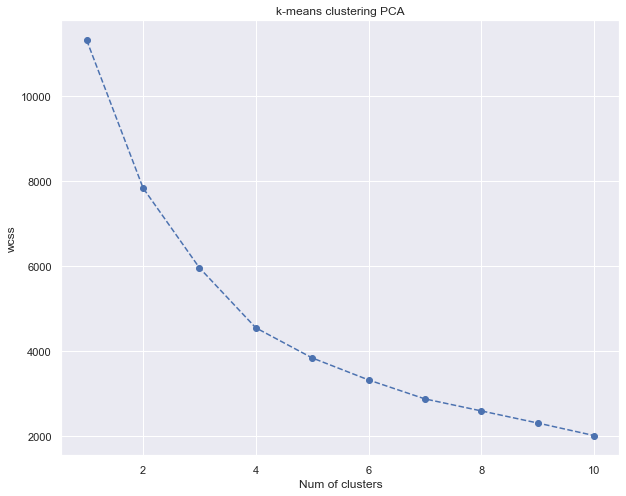

In [65]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),sum_clusters, marker = 'o',linestyle='--')
plt.xlabel('Num of clusters')
plt.ylabel('wcss')
plt.title('k-means clustering PCA')
plt.show()

In [66]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state=43)
kmeans_pca.fit(pca_scores)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=43, tol=0.0001, verbose=0)

In [67]:
df_segm_pca_kmeans = pd.concat([seg_df.reset_index(drop = True), pd.DataFrame(pca_scores)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [68]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,1
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,0
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,1
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,1


In [77]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
1,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [78]:
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'career driven', 
                                                          1:'Standard',
                                                          2:'low income', 
                                                          3:'well-off'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
career driven,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
Standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
low income,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [85]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'career driven', 
                                                          1:'Standard',
                                                          2:'low income', 
                                                          3:'well-off'})
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA,Legend
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3,well-off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,1,Standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2,low income
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,0,career driven
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,0,career driven
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2,low income
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,1,Standard
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2,low income
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,1,Standard


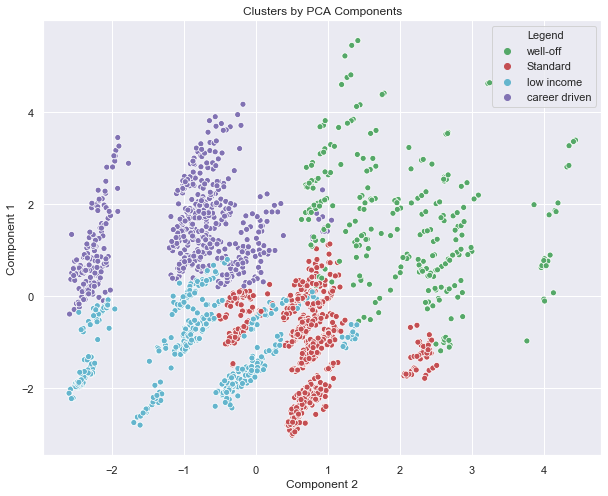

In [86]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

# 𝐃𝐚𝐭𝐚 𝐄𝐱𝐩𝐨𝐫𝐭


In [89]:
pickle.dump(scaler, open('scaler.pickle', 'wb'))
pickle.dump(pca, open('pca.pickle', 'wb'))
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))

# Purchase Analytics Prediction

In [3]:
#load data
df_purchase = pd.read_csv(r'C:\Users\mvanj\Desktop\segmentation project\purchase data.csv')

# Import Scaler
scaler = pickle.load(open('scaler.pickle', 'rb'))
# Import PCA
pca = pickle.load(open('pca.pickle', 'rb'))
# Import K-Means
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))
# Standardization
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
# Apply PCA
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
# Segment data
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

# Create a copy of the data frame
df_purchase_predictors = df_purchase.copy()
# Add segment labels
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors

# Purchase Probability Model

In [5]:
Y = df_pa['Incidence']

In [6]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

In [9]:
from sklearn.linear_model import LogisticRegression 

model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
model_purchase.coef_

array([[-2.34750394]])

# Price Elasticity of Purchase Probability

In [11]:
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [14]:
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [15]:
df_price_range = pd.DataFrame(price_range)

In [16]:
Y_pr = model_purchase.predict_proba(df_price_range)
purchase_pr = Y_pr[:][:, 1]
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)

In [17]:
df_price_elasticities = pd.DataFrame(price_range)

In [18]:
df_price_elasticities = df_price_elasticities.rename(columns = {0: "Price_Point"})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096342
1,0.51,-0.100407
2,0.52,-0.104599
3,0.53,-0.108921
4,0.54,-0.113377
...,...,...
295,3.45,-8.010845
296,3.46,-8.036092
297,3.47,-8.061304
298,3.48,-8.086483


In [19]:
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096342
1,0.51,-0.100407
2,0.52,-0.104599
3,0.53,-0.108921
4,0.54,-0.113377
5,0.55,-0.117969
6,0.56,-0.122700
7,0.57,-0.127575
8,0.58,-0.132596
9,0.59,-0.137767


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

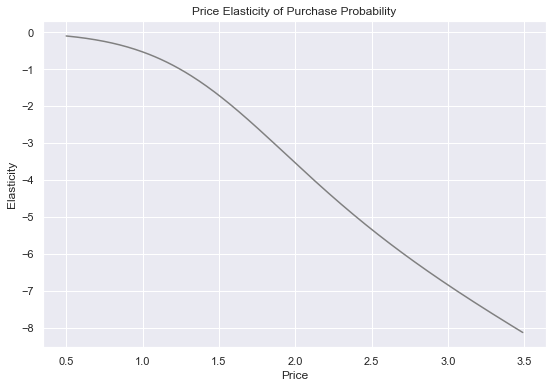

In [20]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

# Purchase Probability by Segments

# Career driven

In [21]:
df_pa_segment_1 = df_pa[df_pa['Segment'] == 1]

In [22]:
Y = df_pa_segment_1['Incidence']

In [23]:
X = pd.DataFrame()

In [24]:
X['Mean_Price'] = (df_pa_segment_1['Price_1'] + 
                   df_pa_segment_1['Price_2'] + 
                   df_pa_segment_1['Price_3'] + 
                   df_pa_segment_1['Price_4'] + 
                   df_pa_segment_1['Price_5']) / 5

In [25]:
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
model_incidence_segment_1.coef_

array([[-1.5078931]])

In [27]:
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:, 1]
pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pr_segment_1)

In [28]:
df_price_elasticities['PE_Segment_1'] = pe_segment_1

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

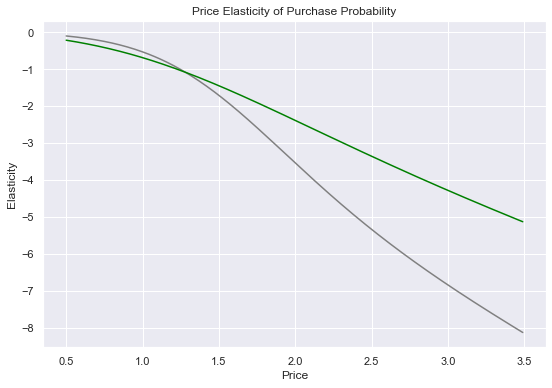

In [29]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

# Low income

In [30]:
df_pa_segment_2 = df_pa[df_pa['Segment'] == 2]

In [31]:
Y = df_pa_segment_2['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_2['Price_1'] + 
                   df_pa_segment_2['Price_2'] + 
                   df_pa_segment_2['Price_3'] + 
                   df_pa_segment_2['Price_4'] + 
                   df_pa_segment_2['Price_5']) / 5

model_incidence_segment2 = LogisticRegression(solver = 'sag')
model_incidence_segment2.fit(X, Y)

# Calculate price elasticities
model_incidence_segment2.coef_
Y_segment_2 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment2 = Y_segment_2[:][: , 1]
pe_segment2 = model_incidence_segment2.coef_[:,0] * price_range * ( 1- purchase_pr_segment2)

In [32]:
df_price_elasticities['PE_Segment_2'] = pe_segment2

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

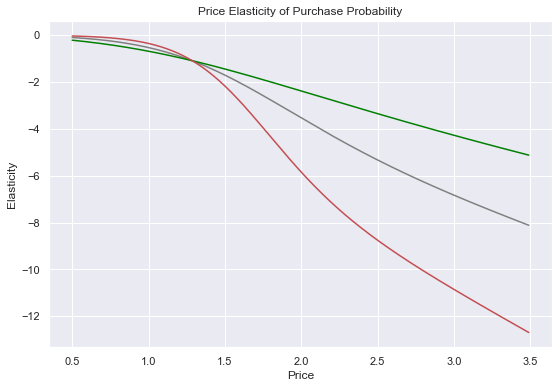

In [33]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

# Standard

In [34]:
df_pa_segment_0 = df_pa[df_pa['Segment'] == 0]
# Prepare dependant and independant variables.
Y = df_pa_segment_0['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_0['Price_1'] + 
                   df_pa_segment_0['Price_2'] + 
                   df_pa_segment_0['Price_3'] + 
                   df_pa_segment_0['Price_4'] + 
                   df_pa_segment_0['Price_5']) / 5
# Logistic regression model
model_incidence_segment0 = LogisticRegression(solver = 'sag')
model_incidence_segment0.fit(X, Y)

model_incidence_segment0.coef_
Y_segment_0 = model_incidence_segment0.predict_proba(df_price_range)
purchase_pr_segment0 = Y_segment_0[:][: , 1]
pe_segment0 = model_incidence_segment0.coef_[:,0] * price_range *( 1- purchase_pr_segment0)
df_price_elasticities.insert(2, column = 'PE_Segment_0', value = pe_segment0)

# well-off

In [35]:
df_pa_segment_3 = df_pa[df_pa['Segment'] == 3]
# Prepare dependant and independant variables.
Y = df_pa_segment_3['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_3['Price_1'] + 
                   df_pa_segment_3['Price_2'] + 
                   df_pa_segment_3['Price_3'] + 
                   df_pa_segment_3['Price_4'] + 
                   df_pa_segment_3['Price_5']) / 5
# Logistic regression model
model_incidence_segment3 = LogisticRegression(solver = 'sag')
model_incidence_segment3.fit(X, Y)

model_incidence_segment3.coef_
Y_segment_3 = model_incidence_segment3.predict_proba(df_price_range)
purchase_pr_segment3 = Y_segment_3[:][: , 1]
pe_segment3 = model_incidence_segment3.coef_[:,0] * price_range *( 1- purchase_pr_segment3)
df_price_elasticities['PE_Segment_3'] = pe_segment3
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3
0,0.50,-0.096342,-0.119095,-0.211182,-0.030924,-0.167989
1,0.51,-0.100407,-0.123279,-0.217751,-0.032691,-0.172912
2,0.52,-0.104599,-0.127555,-0.224429,-0.034545,-0.177906
3,0.53,-0.108921,-0.131927,-0.231215,-0.036489,-0.182970
4,0.54,-0.113377,-0.136394,-0.238110,-0.038529,-0.188106
5,0.55,-0.117969,-0.140960,-0.245115,-0.040667,-0.193313
6,0.56,-0.122700,-0.145625,-0.252230,-0.042909,-0.198593
7,0.57,-0.127575,-0.150390,-0.259458,-0.045259,-0.203945
8,0.58,-0.132596,-0.155258,-0.266797,-0.047722,-0.209371
9,0.59,-0.137767,-0.160229,-0.274249,-0.050302,-0.214870


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

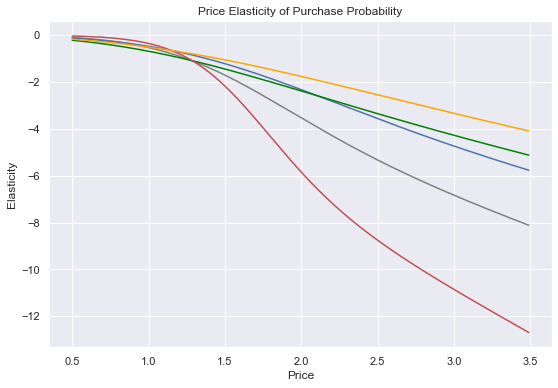

In [36]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment0, color = 'b')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.plot(price_range, pe_segment3, color = 'orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

# Purchase Probability with Promotion Feature
Data Preparation

In [37]:
Y = df_pa['Incidence']

In [38]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] + 
                   df_pa['Price_2'] + 
                   df_pa['Price_3'] + 
                   df_pa['Price_4'] + 
                   df_pa['Price_5']) / 5

In [39]:
X['Mean_Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5'] ) / 5
X.head()

,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


# Model Estimation

In [40]:
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X, Y)
model_incidence_promotion.coef_

array([[-1.49403299,  0.56151816]])

# Price Elasticity with Promotion

In [41]:
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: "Price_Range"})

In [42]:
df_price_elasticity_promotion['Promotion'] = 1

In [43]:
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

In [44]:
promo = Y_promotion[:, 1]
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)

In [45]:
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1
0,0.50,-0.096342,-0.119095,-0.211182,-0.030924,-0.167989,-0.125733
1,0.51,-0.100407,-0.123279,-0.217751,-0.032691,-0.172912,-0.129850
2,0.52,-0.104599,-0.127555,-0.224429,-0.034545,-0.177906,-0.134045
3,0.53,-0.108921,-0.131927,-0.231215,-0.036489,-0.182970,-0.138320
4,0.54,-0.113377,-0.136394,-0.238110,-0.038529,-0.188106,-0.142676
5,0.55,-0.117969,-0.140960,-0.245115,-0.040667,-0.193313,-0.147114
6,0.56,-0.122700,-0.145625,-0.252230,-0.042909,-0.198593,-0.151635
7,0.57,-0.127575,-0.150390,-0.259458,-0.045259,-0.203945,-0.156239
8,0.58,-0.132596,-0.155258,-0.266797,-0.047722,-0.209371,-0.160929
9,0.59,-0.137767,-0.160229,-0.274249,-0.050302,-0.214870,-0.165705


# Price Elasticity without Promotion

In [46]:
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Price_Range"})

In [47]:
df_price_elasticity_promotion_no['Promotion'] = 0

In [48]:
Y_no_promo = model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no)

In [49]:
no_promo = Y_no_promo[: , 1]

In [50]:
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range *(1- no_promo)

In [51]:
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

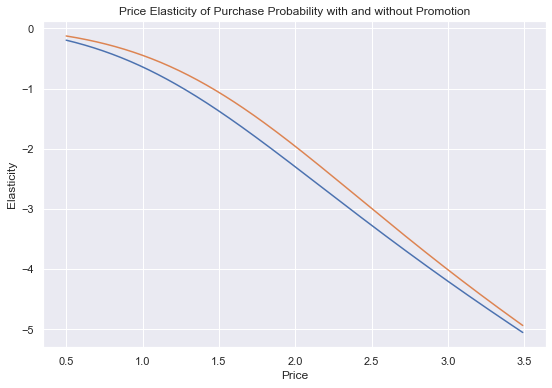

In [52]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')

# Brand Choice

In [53]:
brand_choice = df_pa[df_pa['Incidence'] == 1]

In [54]:
pd.options.display.max_rows = 100
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,0,0,1,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,0,0,1,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,42,1,120946,1,0,2,0,0,1,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,42,1,120946,1,0,2,0,0,1,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,42,1,120946,1,0,2,0,0,1,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,42,1,120946,1,0,2,0,0,1,0


In [55]:
Y = brand_choice['Brand']

In [56]:
brand_choice.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3'], dtype=object)

In [57]:
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X = brand_choice[features]

In [58]:
model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_brand_choice.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
model_brand_choice.coef_

array([[-3.91595752,  0.65846025,  2.41772219,  0.70408871, -0.20210648],
       [ 1.27461638, -1.87985344, -0.2126247 , -0.20633715,  0.58787638],
       [ 1.62417453,  0.56210223,  0.50081669,  1.03949226,  0.45276605],
       [ 0.57454267,  0.39559046, -1.40058229, -1.24623968,  0.24935787],
       [ 0.44262396,  0.2637005 , -1.30533189, -0.29100414, -1.08789382]])

In [60]:
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915958,0.658460,2.417722,0.704089,-0.202106
1,1.274616,-1.879853,-0.212625,-0.206337,0.587876
2,1.624175,0.562102,0.500817,1.039492,0.452766
3,0.574543,0.395590,-1.400582,-1.246240,0.249358
4,0.442624,0.263701,-1.305332,-0.291004,-1.087894


In [61]:
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


# Own Price Elasticity Brand 5

In [62]:
df_own_brand_5 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_5['Price_5'] = price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [63]:
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)

In [64]:
pr_own_brand_5 = predict_brand_5[: ][:, 4]

In [65]:
beta5 = bc_coef.iloc[4, 4]
beta5

-1.09

In [66]:
own_price_elasticity_brand_5 = beta5 * price_range * (1 - pr_own_brand_5)

In [67]:
df_price_elasticities['Brand_5'] = own_price_elasticity_brand_5
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5
0,0.50,-0.096342,-0.119095,-0.211182,-0.030924,-0.167989,-0.125733,-0.195645,-0.049056
1,0.51,-0.100407,-0.123279,-0.217751,-0.032691,-0.172912,-0.129850,-0.201767,-0.050617
2,0.52,-0.104599,-0.127555,-0.224429,-0.034545,-0.177906,-0.134045,-0.207991,-0.052207
3,0.53,-0.108921,-0.131927,-0.231215,-0.036489,-0.182970,-0.138320,-0.214318,-0.053827
4,0.54,-0.113377,-0.136394,-0.238110,-0.038529,-0.188106,-0.142676,-0.220749,-0.055477
5,0.55,-0.117969,-0.140960,-0.245115,-0.040667,-0.193313,-0.147114,-0.227285,-0.057159
6,0.56,-0.122700,-0.145625,-0.252230,-0.042909,-0.198593,-0.151635,-0.233927,-0.058871
7,0.57,-0.127575,-0.150390,-0.259458,-0.045259,-0.203945,-0.156239,-0.240676,-0.060615
8,0.58,-0.132596,-0.155258,-0.266797,-0.047722,-0.209371,-0.160929,-0.247531,-0.062391
9,0.59,-0.137767,-0.160229,-0.274249,-0.050302,-0.214870,-0.165705,-0.254495,-0.064200


Text(0.5, 1.0, 'Own Price Elasticity of Purchase Probability for Brand 5')

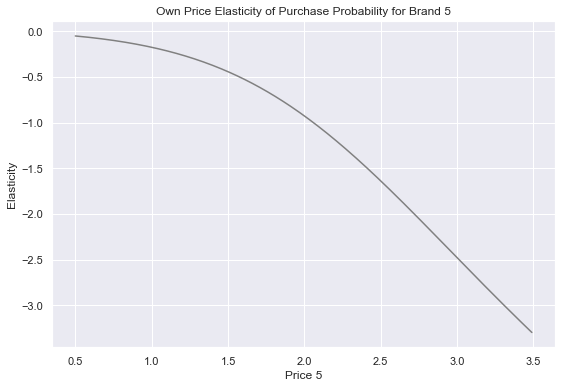

In [68]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, own_price_elasticity_brand_5, color = 'grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5')

# Cross Price Elasticity Brand 5, Cross Brand 4

In [69]:
df_brand5_cross_brand4 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['Price_5'] = brand_choice['Price_5'].mean()

In [70]:
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [71]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)

In [72]:
pr_brand_4 = predict_brand5_cross_brand4[:][:, 3]

In [73]:
beta5

-1.09

In [74]:
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pr_brand_4

In [75]:
df_price_elasticities['Brand_5_Cross_Brand_4'] = brand5_cross_brand4_price_elasticity
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4
0,0.50,-0.096342,-0.119095,-0.211182,-0.030924,-0.167989,-0.125733,-0.195645,-0.049056,0.332011
1,0.51,-0.100407,-0.123279,-0.217751,-0.032691,-0.172912,-0.129850,-0.201767,-0.050617,0.337287
2,0.52,-0.104599,-0.127555,-0.224429,-0.034545,-0.177906,-0.134045,-0.207991,-0.052207,0.342506
3,0.53,-0.108921,-0.131927,-0.231215,-0.036489,-0.182970,-0.138320,-0.214318,-0.053827,0.347668
4,0.54,-0.113377,-0.136394,-0.238110,-0.038529,-0.188106,-0.142676,-0.220749,-0.055477,0.352773
5,0.55,-0.117969,-0.140960,-0.245115,-0.040667,-0.193313,-0.147114,-0.227285,-0.057159,0.357820
6,0.56,-0.122700,-0.145625,-0.252230,-0.042909,-0.198593,-0.151635,-0.233927,-0.058871,0.362809
7,0.57,-0.127575,-0.150390,-0.259458,-0.045259,-0.203945,-0.156239,-0.240676,-0.060615,0.367740
8,0.58,-0.132596,-0.155258,-0.266797,-0.047722,-0.209371,-0.160929,-0.247531,-0.062391,0.372614
9,0.59,-0.137767,-0.160229,-0.274249,-0.050302,-0.214870,-0.165705,-0.254495,-0.064200,0.377429


Text(0.5, 1.0, 'Cross Price Elasticity of Brand 5 wrt Brand 4')

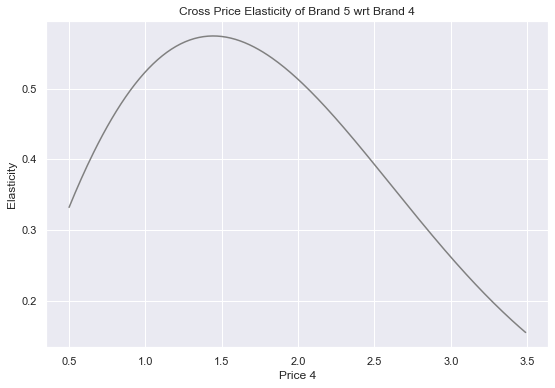

In [76]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, brand5_cross_brand4_price_elasticity, color = 'grey')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt Brand 4')

# Own and Cross-Price Elasticity by Segment

# well-off

In [77]:
brand_choice_s3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment'] == 3]

pd.options.display.max_rows = 100
brand_choice_s3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,52,2,159052,2,1,3,0,0,0,1
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,...,52,2,159052,2,1,3,0,0,0,1
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,...,52,2,159052,2,1,3,0,0,0,1
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,...,52,2,159052,2,1,3,0,0,0,1
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,...,52,2,159052,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57346,200000489,687,1,4,1,4,1,1.50,1.87,2.06,...,44,2,193816,2,1,3,0,0,0,1
57347,200000489,693,1,4,2,4,1,1.42,1.51,2.02,...,44,2,193816,2,1,3,0,0,0,1
57348,200000489,701,1,4,3,4,1,1.42,1.85,1.99,...,44,2,193816,2,1,3,0,0,0,1
57350,200000489,715,1,4,2,0,0,1.50,1.80,2.09,...,44,2,193816,2,1,3,0,0,0,1


In [78]:
Y = brand_choice_s3['Brand']
brand_choice_s3 = pd.get_dummies(brand_choice_s3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s3[features]
model_brand_choice_s3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s3.fit(X, Y)

# Coefficients table for segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-2.15,1.33,0.82,0.12,-0.11
Price_2,-0.96,-1.38,1.29,0.78,0.27
Price_3,2.01,-1.65,-0.49,0.03,0.11
Price_4,2.52,0.96,-0.25,-1.90,-1.33
Price_5,-0.99,-0.30,1.17,0.56,-0.44


In [79]:
# Calculating own-brand price elasticity for brand 5 and the Well-off segment.
df_own_brand_5_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: ][: , 4]

own_price_elasticity_brand_5_s3 =  beta5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticities['Brand 5 S3'] = own_price_elasticity_brand_5_s3

In [80]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Well-off segment.
df_brand5_cross_brand4_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[: ][: , 3]

# Update master data frame to include the newly obtained cross-brand price elasticities.
brand5_cross_brand4_price_elasticity_s3 = -beta5 * price_range * pr_cross_brand_5_s3
df_price_elasticities['Brand_5_Cross_Brand_4_S3'] = brand5_cross_brand4_price_elasticity_s3
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096342,-0.119095,-0.211182,-0.030924,-0.167989,-0.125733,-0.195645,-0.049056,0.332011,-0.297324,0.482421
1,0.51,-0.100407,-0.123279,-0.217751,-0.032691,-0.172912,-0.129850,-0.201767,-0.050617,0.337287,-0.303370,0.491726
2,0.52,-0.104599,-0.127555,-0.224429,-0.034545,-0.177906,-0.134045,-0.207991,-0.052207,0.342506,-0.309426,0.501016
3,0.53,-0.108921,-0.131927,-0.231215,-0.036489,-0.182970,-0.138320,-0.214318,-0.053827,0.347668,-0.315494,0.510290
4,0.54,-0.113377,-0.136394,-0.238110,-0.038529,-0.188106,-0.142676,-0.220749,-0.055477,0.352773,-0.321572,0.519548
5,0.55,-0.117969,-0.140960,-0.245115,-0.040667,-0.193313,-0.147114,-0.227285,-0.057159,0.357820,-0.327661,0.528790
6,0.56,-0.122700,-0.145625,-0.252230,-0.042909,-0.198593,-0.151635,-0.233927,-0.058871,0.362809,-0.333763,0.538016
7,0.57,-0.127575,-0.150390,-0.259458,-0.045259,-0.203945,-0.156239,-0.240676,-0.060615,0.367740,-0.339876,0.547226
8,0.58,-0.132596,-0.155258,-0.266797,-0.047722,-0.209371,-0.160929,-0.247531,-0.062391,0.372614,-0.346003,0.556420
9,0.59,-0.137767,-0.160229,-0.274249,-0.050302,-0.214870,-0.165705,-0.254495,-0.064200,0.377429,-0.352142,0.565597


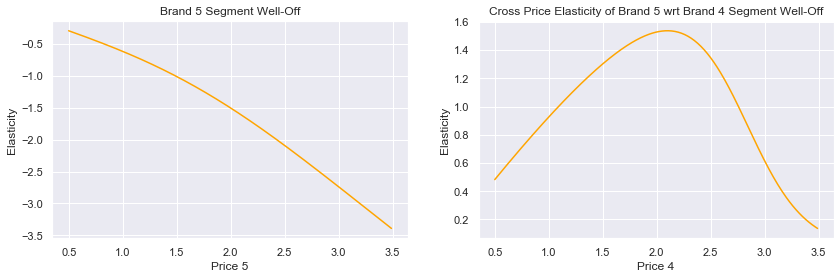

In [81]:
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s3, color = 'orange')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

# Standard

In [82]:
brand_choice_s0 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0['Segment'] == 0]
brand_choice_s0.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
376,200000005,51,1,5,1,0,0,1.35,1.87,1.93,...,49,1,121466,1,2,0,1,0,0,0
377,200000005,57,1,5,1,5,1,1.39,1.90,1.91,...,49,1,121466,1,2,0,1,0,0,0
394,200000005,159,1,5,2,0,0,1.39,1.90,1.94,...,49,1,121466,1,2,0,1,0,0,0
396,200000005,178,1,5,3,0,0,1.48,1.50,1.99,...,49,1,121466,1,2,0,1,0,0,0
410,200000005,249,1,5,1,0,0,1.46,1.89,1.99,...,49,1,121466,1,2,0,1,0,0,0


In [83]:
Y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 200)
model_brand_choice_s0.fit(X, Y)

# Coefficients table segment 0.
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

C:\Users\mvanj\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# Own-Brand Price Elasticity
 

In [84]:
# Calculating own-brand price elasticity for brand 5 and the Standard segment.
df_own_brand_5_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range

predict_own_brand_5_s0 = model_brand_choice_s0.predict_proba(df_own_brand_5_s0)
pr_own_brand_5_s0 = predict_own_brand_5_s0[: ][: , 4]

# Compute price elasticities and update master data frame.
# We'd like to include the elasticities for the segments in order from 0 to three, which is why we use insert() on position 10.
own_price_elasticity_brand_5_s0 =  beta5 * price_range * (1 - pr_own_brand_5_s0)
df_price_elasticities.insert(10, column = 'Brand 5 S0', value = own_price_elasticity_brand_5_s0)

# Cross-Brand Price Elasticity
 

In [85]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Standard segment.
df_brand5_cross_brand4_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_brand5_cross_brand4_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand5_cross_brand4_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand5_cross_brand4_s0['Price_4'] = price_range
df_brand5_cross_brand4_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_brand5_cross_brand4_s0 = model_brand_choice_s0.predict_proba(df_brand5_cross_brand4_s0)
pr_cross_brand_5_s0 = predict_brand5_cross_brand4_s0[: ][: , 3]

# Compute price elasticities and update master data frame.
# We need to use insert() on position 11, to save the price elasticities in the correct order.
brand5_cross_brand4_price_elasticity_s0 = -beta5 * price_range * pr_cross_brand_5_s0
df_price_elasticities.insert(11, column = 'Brand_5_Cross_Brand_4_S0', value = brand5_cross_brand4_price_elasticity_s0)

# Career-driven

In [86]:
brand_choice_s1 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s1 = brand_choice_s1[brand_choice_s1['Segment'] == 1]

In [87]:
Y = brand_choice_s1['Brand']
brand_choice_s1 = pd.get_dummies(brand_choice_s1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s1[features]
model_brand_choice_s1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s1.fit(X, Y)

# Coefficients table segment 1
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s1.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

# Own-Brand Price Elasticity
 

In [88]:
# Calculating own-brand price elasticity for brand 5 and the Career-focused segment.
df_own_brand_5_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range

predict_own_brand_5_s1 = model_brand_choice_s1.predict_proba(df_own_brand_5_s1)
pr_own_brand_5_s1 = predict_own_brand_5_s1[: ][: , 4]

#compute price elasticities and update data frame
own_price_elasticity_brand_5_s1 =  beta5 * price_range * (1 - pr_own_brand_5_s1)
df_price_elasticities.insert(12, column = 'Brand 5 S1', value = own_price_elasticity_brand_5_s1)

# Cross-Brand Price Elasticity
 


In [89]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Career-focused segment.
df_brand5_cross_brand4_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_brand5_cross_brand4_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_brand5_cross_brand4_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_brand5_cross_brand4_s1['Price_4'] = price_range
df_brand5_cross_brand4_s1['Price_5'] = brand_choice_s1['Price_5'].mean()

predict_brand5_cross_brand4_s1 = model_brand_choice_s1.predict_proba(df_brand5_cross_brand4_s1)
pr_cross_brand_5_s1 = predict_brand5_cross_brand4_s1[: ][: , 3]

brand5_cross_brand4_price_elasticity_s1 = -beta5 * price_range * pr_cross_brand_5_s1
df_price_elasticities.insert(13, column = 'Brand_5_Cross_Brand_4_S1', value = brand5_cross_brand4_price_elasticity_s1)

# Low income

In [90]:
brand_choice_s2 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s2 = brand_choice_s2[brand_choice_s2['Segment'] == 2]

In [91]:
# Brand Choice Model estimation.
Y = brand_choice_s2['Brand']
brand_choice_s2 = pd.get_dummies(brand_choice_s2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s2[features]
model_brand_choice_s2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s2.fit(X, Y)

# Coefficients table segment 2
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s2.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

# Own-Brand Price Elasticity
 

In [92]:
# Calculating own-brand price elasticity for brand 5 and the Fewer-opportunities segment.
df_own_brand_5_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_own_brand_5_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_own_brand_5_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_own_brand_5_s2['Price_4'] = brand_choice_s2['Price_4'].mean()
df_own_brand_5_s2['Price_5'] = price_range

predict_own_brand_5_s2 = model_brand_choice_s2.predict_proba(df_own_brand_5_s2)
pr_own_brand_5_s2 = predict_own_brand_5_s2[: ][: , 4]

#compute price elasticities and update data frame
own_price_elasticity_brand_5_s2 =  beta5 * price_range * (1 - pr_own_brand_5_s2)
df_price_elasticities.insert(14, column = 'Brand 5 S2', value = own_price_elasticity_brand_5_s2)

# Cross-Brand Price Elasticity
 

In [93]:
df_brand5_cross_brand4_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_brand5_cross_brand4_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_brand5_cross_brand4_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_brand5_cross_brand4_s2['Price_4'] = price_range
df_brand5_cross_brand4_s2['Price_5'] = brand_choice_s2['Price_5'].mean()

predict_brand5_cross_brand4_s2 = model_brand_choice_s2.predict_proba(df_brand5_cross_brand4_s2)
pr_cross_brand_5_s2 = predict_brand5_cross_brand4_s2[: ][: , 3]

brand5_cross_brand4_price_elasticity_s2 = -beta5 * price_range * pr_cross_brand_5_s2
df_price_elasticities.insert(15, column = 'Brand_5_Cross_Brand_4_S2', value = brand5_cross_brand4_price_elasticity_s2)
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096342,-0.119095,-0.211182,-0.030924,-0.167989,-0.125733,-0.195645,-0.049056,0.332011,-0.043927,0.194602,-0.115833,0.174106,-0.001036,0.181598,-0.297324,0.482421
1,0.51,-0.100407,-0.123279,-0.217751,-0.032691,-0.172912,-0.129850,-0.201767,-0.050617,0.337287,-0.045014,0.197084,-0.118872,0.176162,-0.001098,0.183895,-0.303370,0.491726
2,0.52,-0.104599,-0.127555,-0.224429,-0.034545,-0.177906,-0.134045,-0.207991,-0.052207,0.342506,-0.046109,0.199515,-0.121946,0.178166,-0.001163,0.186143,-0.309426,0.501016
3,0.53,-0.108921,-0.131927,-0.231215,-0.036489,-0.182970,-0.138320,-0.214318,-0.053827,0.347668,-0.047215,0.201896,-0.125055,0.180120,-0.001231,0.188342,-0.315494,0.510290
4,0.54,-0.113377,-0.136394,-0.238110,-0.038529,-0.188106,-0.142676,-0.220749,-0.055477,0.352773,-0.048330,0.204226,-0.128200,0.182023,-0.001303,0.190493,-0.321572,0.519548
5,0.55,-0.117969,-0.140960,-0.245115,-0.040667,-0.193313,-0.147114,-0.227285,-0.057159,0.357820,-0.049454,0.206507,-0.131381,0.183876,-0.001378,0.192596,-0.327661,0.528790
6,0.56,-0.122700,-0.145625,-0.252230,-0.042909,-0.198593,-0.151635,-0.233927,-0.058871,0.362809,-0.050588,0.208737,-0.134598,0.185680,-0.001458,0.194651,-0.333763,0.538016
7,0.57,-0.127575,-0.150390,-0.259458,-0.045259,-0.203945,-0.156239,-0.240676,-0.060615,0.367740,-0.051731,0.210919,-0.137853,0.187434,-0.001541,0.196658,-0.339876,0.547226
8,0.58,-0.132596,-0.155258,-0.266797,-0.047722,-0.209371,-0.160929,-0.247531,-0.062391,0.372614,-0.052885,0.213052,-0.141145,0.189140,-0.001629,0.198618,-0.346003,0.556420
9,0.59,-0.137767,-0.160229,-0.274249,-0.050302,-0.214870,-0.165705,-0.254495,-0.064200,0.377429,-0.054048,0.215136,-0.144475,0.190796,-0.001721,0.200531,-0.352142,0.565597


Text(0.5, 0, 'Price 4')

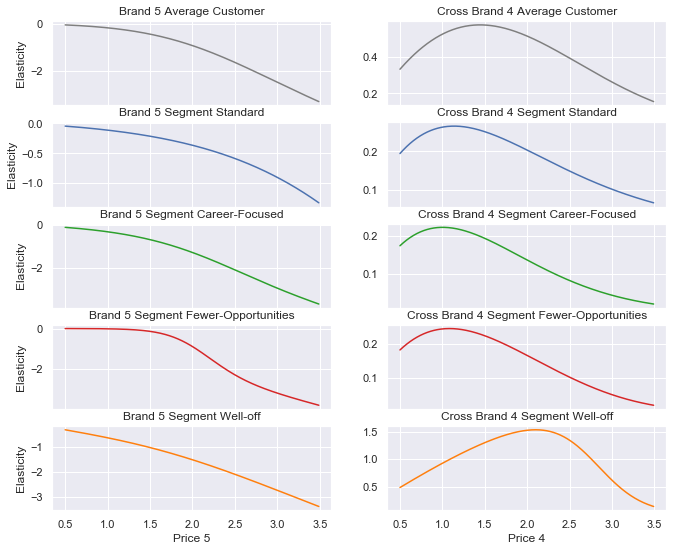

In [94]:
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_brand_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s0)
ax2[0].set_title('Brand 5 Segment Standard')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0)
ax2[1].set_title('Cross Brand 4 Segment Standard')

ax3[0].plot(price_range, own_price_elasticity_brand_5_s1, 'tab:green')
ax3[0].set_title('Brand 5 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_s1, 'tab:green')
ax3[1].set_title('Cross Brand 4 Segment Career-Focused')

ax4[0].plot(price_range, own_price_elasticity_brand_5_s2, 'tab:red')
ax4[0].set_title('Brand 5 Segment Fewer-Opportunities')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, 'tab:red')
ax4[1].set_title('Cross Brand 4 Segment Fewer-Opportunities')

ax5[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:orange')
ax5[0].set_title('Brand 5 Segment Well-off')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, 'tab:orange')
ax5[1].set_title('Cross Brand 4 Segment Well-off')
ax5[1].set_xlabel('Price 4')

# Price Elasticity of Purchase Quantity

In [95]:
df_purchase_quantity = df_pa[df_pa['Incidence'] == 1]
df_purchase_quantity.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,0,0,1,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,0,0,1,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,0,0,1,0


In [96]:
df_purchase_quantity = pd.get_dummies(df_purchase_quantity, columns = ['Brand'], prefix = 'Brand', prefix_sep = '_')
df_purchase_quantity.describe()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Segment,Segment_0,Segment_1,Segment_2,Segment_3,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,...,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,...,1.457849,0.299290,0.175229,0.293824,0.231657,0.092226,0.310288,0.057453,0.199959,0.340074
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,...,1.144643,0.457962,0.380176,0.455528,0.421906,0.289354,0.462627,0.232714,0.399983,0.473750
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,...,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
df_purchase_quantity.columns.values

array(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3', 'Brand_1',
       'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5'], dtype=object)

In [98]:
df_purchase_quantity['Price_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Price_1'] +
                                           df_purchase_quantity['Brand_2'] * df_purchase_quantity['Price_2'] +
                                           df_purchase_quantity['Brand_3'] * df_purchase_quantity['Price_3'] +
                                           df_purchase_quantity['Brand_4'] * df_purchase_quantity['Price_4'] +
                                           df_purchase_quantity['Brand_5'] * df_purchase_quantity['Price_5'] )

In [99]:
df_purchase_quantity['Promotion_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Promotion_1'] +
                                               df_purchase_quantity['Brand_2'] * df_purchase_quantity['Promotion_2'] +
                                               df_purchase_quantity['Brand_3'] * df_purchase_quantity['Promotion_3'] +
                                               df_purchase_quantity['Brand_4'] * df_purchase_quantity['Promotion_4'] +
                                               df_purchase_quantity['Brand_5'] * df_purchase_quantity['Promotion_5'] )

# Model Estimation. Linear Regression

In [100]:
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence']]
pd.options.display.max_rows = 100
X

,Price_Incidence,Promotion_Incidence
6,1.90,0
11,2.62,1
19,1.47,0
24,2.16,0
29,1.88,0
...,...,...
58621,1.89,0
58648,1.35,1
58674,1.85,1
58687,1.51,0


In [101]:
Y = df_purchase_quantity['Quantity']
Y.head()

6     2
11    1
19    2
24    1
29    3
Name: Quantity, dtype: int64

In [102]:
# Linear Regression Model
model_quantity = LinearRegression()
model_quantity.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
model_quantity.coef_

array([-0.8173651 , -0.10504673])

# Price Elasticity with Promotion

In [104]:
df_price_elasticity_quantity = pd.DataFrame(index = np.arange(price_range.size))
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 1

In [105]:
beta_quantity = model_quantity.coef_[0]
beta_quantity

-0.8173651016684997

In [106]:
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

In [107]:
price_elasticity_quantity_promotion_yes = beta_quantity * price_range / predict_quantity

In [108]:
df_price_elasticities['PE_Quantity_Promotion_1'] = price_elasticity_quantity_promotion_yes
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1
0,0.50,-0.096342,-0.119095,-0.211182,-0.030924,-0.167989,-0.125733,-0.195645,-0.049056,0.332011,-0.043927,0.194602,-0.115833,0.174106,-0.001036,0.181598,-0.297324,0.482421,-0.102157
1,0.51,-0.100407,-0.123279,-0.217751,-0.032691,-0.172912,-0.129850,-0.201767,-0.050617,0.337287,-0.045014,0.197084,-0.118872,0.176162,-0.001098,0.183895,-0.303370,0.491726,-0.104413
2,0.52,-0.104599,-0.127555,-0.224429,-0.034545,-0.177906,-0.134045,-0.207991,-0.052207,0.342506,-0.046109,0.199515,-0.121946,0.178166,-0.001163,0.186143,-0.309426,0.501016,-0.106679
3,0.53,-0.108921,-0.131927,-0.231215,-0.036489,-0.182970,-0.138320,-0.214318,-0.053827,0.347668,-0.047215,0.201896,-0.125055,0.180120,-0.001231,0.188342,-0.315494,0.510290,-0.108954
4,0.54,-0.113377,-0.136394,-0.238110,-0.038529,-0.188106,-0.142676,-0.220749,-0.055477,0.352773,-0.048330,0.204226,-0.128200,0.182023,-0.001303,0.190493,-0.321572,0.519548,-0.111238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.010845,-5.681024,-5.050381,-12.540941,-4.021745,-4.861652,-4.983263,-3.231572,0.162236,-1.287231,0.068672,-3.592451,0.024054,-3.746081,0.023405,-3.337314,0.157485,-1.774292
296,3.46,-8.036092,-5.701181,-5.067234,-12.577856,-4.036612,-4.879854,-5.000169,-3.247765,0.160335,-1.297035,0.068048,-3.606356,0.023698,-3.757523,0.022945,-3.350644,0.152063,-1.788634
297,3.47,-8.061304,-5.721301,-5.084068,-12.614754,-4.051463,-4.898026,-5.017055,-3.263927,0.158449,-1.306895,0.067430,-3.620216,0.023346,-3.768945,0.022493,-3.363971,0.146807,-1.803124
298,3.48,-8.086483,-5.741385,-5.100883,-12.651635,-4.066298,-4.916166,-5.033922,-3.280057,0.156578,-1.316809,0.066816,-3.634032,0.022998,-3.780348,0.022047,-3.377295,0.141711,-1.817766


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

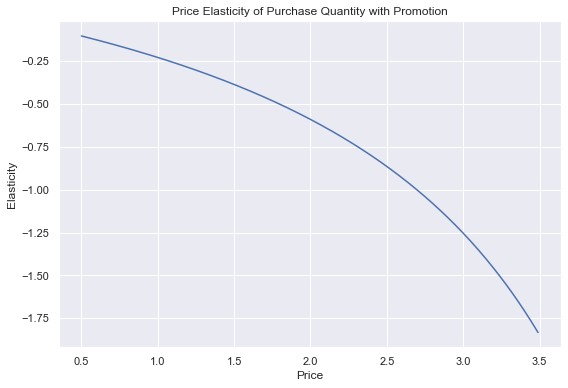

In [109]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')

# Price Elasticity without Promotion

In [110]:
df_price_elasticity_quantity['Promotion_Incidence'] = 0
# Find the new predicted quantities.
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)
# Calculate the new price elasticities.
price_elasticity_quantity_promotion_no = beta_quantity * price_range / predict_quantity
# Add the results to the master data frame.
df_price_elasticities['PE_Quantity_Promotion_0'] = price_elasticity_quantity_promotion_no
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0.50,-0.096342,-0.119095,-0.211182,-0.030924,-0.167989,-0.125733,-0.195645,-0.049056,0.332011,-0.043927,0.194602,-0.115833,0.174106,-0.001036,0.181598,-0.297324,0.482421,-0.102157,-0.099543
1,0.51,-0.100407,-0.123279,-0.217751,-0.032691,-0.172912,-0.129850,-0.201767,-0.050617,0.337287,-0.045014,0.197084,-0.118872,0.176162,-0.001098,0.183895,-0.303370,0.491726,-0.104413,-0.101736
2,0.52,-0.104599,-0.127555,-0.224429,-0.034545,-0.177906,-0.134045,-0.207991,-0.052207,0.342506,-0.046109,0.199515,-0.121946,0.178166,-0.001163,0.186143,-0.309426,0.501016,-0.106679,-0.103939
3,0.53,-0.108921,-0.131927,-0.231215,-0.036489,-0.182970,-0.138320,-0.214318,-0.053827,0.347668,-0.047215,0.201896,-0.125055,0.180120,-0.001231,0.188342,-0.315494,0.510290,-0.108954,-0.106150
4,0.54,-0.113377,-0.136394,-0.238110,-0.038529,-0.188106,-0.142676,-0.220749,-0.055477,0.352773,-0.048330,0.204226,-0.128200,0.182023,-0.001303,0.190493,-0.321572,0.519548,-0.111238,-0.108369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.010845,-5.681024,-5.050381,-12.540941,-4.021745,-4.861652,-4.983263,-3.231572,0.162236,-1.287231,0.068672,-3.592451,0.024054,-3.746081,0.023405,-3.337314,0.157485,-1.774292,-1.664290
296,3.46,-8.036092,-5.701181,-5.067234,-12.577856,-4.036612,-4.879854,-5.000169,-3.247765,0.160335,-1.297035,0.068048,-3.606356,0.023698,-3.757523,0.022945,-3.350644,0.152063,-1.788634,-1.677205
297,3.47,-8.061304,-5.721301,-5.084068,-12.614754,-4.051463,-4.898026,-5.017055,-3.263927,0.158449,-1.306895,0.067430,-3.620216,0.023346,-3.768945,0.022493,-3.363971,0.146807,-1.803124,-1.690246
298,3.48,-8.086483,-5.741385,-5.100883,-12.651635,-4.066298,-4.916166,-5.033922,-3.280057,0.156578,-1.316809,0.066816,-3.634032,0.022998,-3.780348,0.022047,-3.377295,0.141711,-1.817766,-1.703414


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

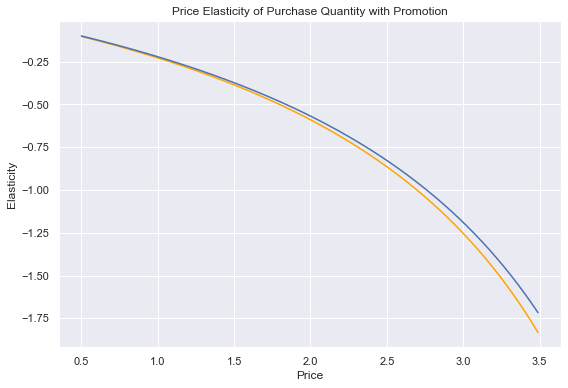

In [111]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes, color = 'orange')
plt.plot(price_range, price_elasticity_quantity_promotion_no)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')